In [35]:
%matplotlib inline
from CartPole import CartPole, remap_angle, _remap_angle, _loss, loss, move_cart
import numpy as np
import matplotlib.pyplot as plt

In [91]:
plot_path = 'plots/Task2/'

In [81]:
def kernel(X, X_dash, sigma=[0.5,1,0.333,1.667]):
    
    try:
        assert X.shape == 4 and X_dash.shape == 4, 'shape error, X: {} X_dash: {}'.format(X.shape, X_dash.shape)
    except:
        assert len(X) == 4 and len(X_dash) == 4, 'length of list error, X: {}, X_dash: {}'.format(len(X), len(X_dash))
        X = np.array(X)
        X_dash = np.array(X_dash)
        
    assert all(sigma) >= 0, 'negative value of variance given in sigma: {}'.format(sigma)
    
    return np.exp(-np.sum(np.divide(np.array([(X[i]-X_dash[i])**2 if i != 2  else (np.sin(X[i]-X_dash[i]/2))**2 for i in range(4)]), 2*np.square(sigma))))

In [89]:
X = np.array([0, np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
X_dash_array = np.array([[np.random.normal(), X[1], X[2], X[3]] for i in range(500)])

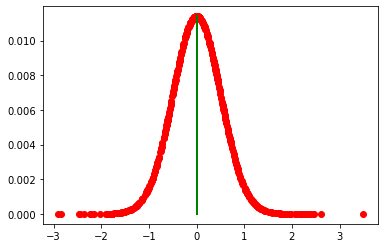

In [93]:
for i,X_dash in enumerate(X_dash_array):
    plt.scatter(X_dash[0], kernel(X, X_dash), color='r')
    plt.plot([X[0]]*30, np.linspace(min([kernel(X,X_dash_) for X_dash_ in X_dash_array]), max([kernel(X,X_dash_) for X_dash_ in X_dash_array]), 30), color='g')
    
plt.savefig(plot_path + 'kernel_plot')
    